<a href="https://colab.research.google.com/github/rerebebeccacca/20210602-machine-learing/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()


170500096/170498071 [==============================] - 4s 0us/step


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
names = [
          "airplane",									
          "automobile",							
          "bird",				
          "cat",								
          "deer",									
          "dog",									
          "frog",										
          "horse",										
          "ship",									
          "truck"
]

7


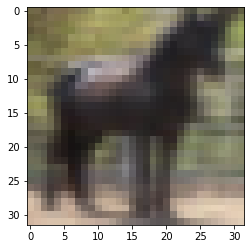

In [6]:
# mnist：(60000, )[5,2,1,0]
import matplotlib.pyplot as plt
import random
idx = random.randint(0,49999)
print(y_train[idx][0])
plt.imshow(x_train[idx])

